In [1]:
import iisignature
# from esig import tosig
from tosig import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
path_dims = [2, 5, 8]
sig_depths = [2, 3, 4, 5, 6]

path_lengths = [10, 100]
how_many = 1

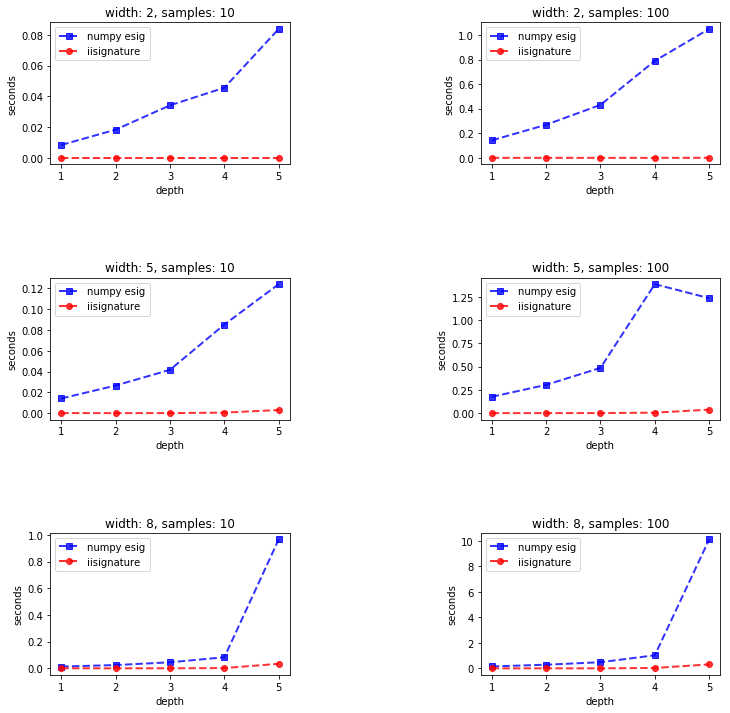

In [3]:
fig, axes = plt.subplots(ncols=len(path_lengths), nrows=len(path_dims))

k = 0

for width in path_dims:
    for path_length in path_lengths:

        paths = [np.random.rand(path_length, width) for n in range(how_many)]

        df = pd.DataFrame()

        time_iisig = []
        time_esig_numpy = []

        for depth in sig_depths:

            t = time.time()
            sigs = [iisignature.sig(path, depth) for path in paths]
            time_iisig.append(time.time() - t)

            t = time.time()
            sigs = [stream2sig(path, depth) for path in paths]
            time_esig_numpy.append(time.time() - t)

        df['numpy esig'] = time_esig_numpy 
        df['iisignature'] = time_iisig
        df.index = [i+1 for i in df.index]

        df.plot(title=f'width: {width}, samples: {path_length}', ax=axes.flat[k],
                style=['bs--','ro--'], lw=2, alpha=0.8, figsize=(12,12))
        
        axes.flat[k].set_xlabel('depth')
        axes.flat[k].set_ylabel('seconds')
        k+=1
        
plt.subplots_adjust(hspace=0.8, wspace=0.8)
plt.show()